In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/CAChemE/curso-python-datos/master/data/weather_data.csv"
df = pd.read_csv(url)


In [ ]:
#pasar los datos fecha de string a datatime
df['fecha'] = pd.to_datetime(df['fecha'])
print("\nTipo de dato de la columna 'fecha':", df['fecha'].dtype)



Tipo de dato de la columna 'fecha': datetime64[ns]


In [16]:
##limpiar datos con values y 0
df.replace('Varias', pd.NA, inplace = True)  
df = df.replace(0, pd.NA)  
df.dropna(inplace = True) 
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 2 to 1814
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   altitud      472 non-null    float64       
 1   dir          472 non-null    float64       
 2   fecha        472 non-null    datetime64[ns]
 3   horaPresMax  472 non-null    object        
 4   horaPresMin  472 non-null    object        
 5   horaracha    472 non-null    object        
 6   horatmax     472 non-null    object        
 7   horatmin     472 non-null    object        
 8   indicativo   472 non-null    object        
 9   nombre       472 non-null    object        
 10  prec         472 non-null    object        
 11  presMax      472 non-null    float64       
 12  presMin      472 non-null    float64       
 13  provincia    472 non-null    object        
 14  racha        472 non-null    float64       
 15  sol          472 non-null    object        
 16  tmax        

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
2,52.0,99.0,2012-03-03,17,04,13:40,12:00,06:00,1111X,SANTANDER,0.8,1021.3,1017.8,CANTABRIA,7.2,6.8,17.8,13.7,9.6,2.5
3,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
4,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
7,52.0,29.0,2012-03-07,23,04,21:20,14:40,05:30,1111X,SANTANDER,2.4,1025.4,1021.1,CANTABRIA,12.5,6.5,13.2,9.3,5.4,3.1
17,52.0,31.0,2012-03-17,00,12,14:10,11:30,23:59,1111X,SANTANDER,8.2,1016.3,1012.1,CANTABRIA,15.8,4.2,16.2,12.0,7.7,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,52.0,18.0,2016-11-21,24,01,01:10,03:20,07:00,1111X,SANTANDER,0.4,998.5,982.4,CANTABRIA,23.3,7.3,18.0,13.9,9.8,5.0
1785,52.0,30.0,2016-11-22,23,00,00:20,13:40,23:30,1111X,SANTANDER,28.6,1004.2,998.4,CANTABRIA,8.3,2.4,12.7,10.4,8.1,2.8
1808,52.0,19.0,2016-12-14,21,05,06:40,12:20,21:40,1111X,SANTANDER,0.8,1014.9,1008.1,CANTABRIA,14.7,2.0,17.9,14.0,10.2,5.8
1810,52.0,19.0,2016-12-16,24,01,00:50,13:20,23:40,1111X,SANTANDER,0.1,1023.5,1006.0,CANTABRIA,17.2,1.4,13.9,12.0,10.2,3.9


In [14]:

print(df.shape)
# La temperatura media del período registrado.
temperatura_media = df['tmed'].mean()
print(f"\nTemperatura media del período: {temperatura_media:.2f} °C")

# La temperatura máxima y la fecha en la que ocurrió.
max_temp = df['tmax'].max()
fecha_max_temp = df['fecha'][df['tmax'] == max_temp].iloc[0]
print(f"Temperatura máxima: {max_temp:.2f} °C, ocurrida el: {fecha_max_temp.strftime('%Y-%m-%d')}")

# La temperatura mínima y la fecha en la que ocurrió.
min_temp = df['tmin'].min()
fecha_min_temp = df['fecha'][df['tmin'] == min_temp].iloc[0]
print(f"Temperatura mínima: {min_temp:.2f} °C, ocurrida el: {fecha_min_temp.strftime('%Y-%m-%d')}")

# El rango de temperatura (máxima - mínima).
rango_temp = max_temp - min_temp
print(f"Rango de temperatura: {rango_temp:.2f} °C")


(472, 20)

Temperatura media del período: 13.99 °C
Temperatura máxima: 32.80 °C, ocurrida el: 2012-06-27
Temperatura mínima: 1.00 °C, ocurrida el: 2015-02-04
Rango de temperatura: 31.80 °C


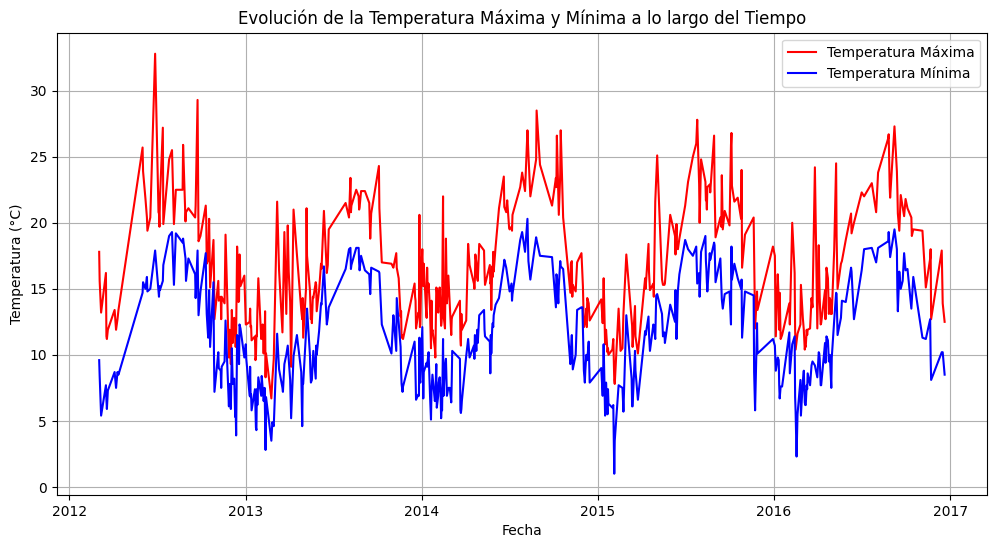

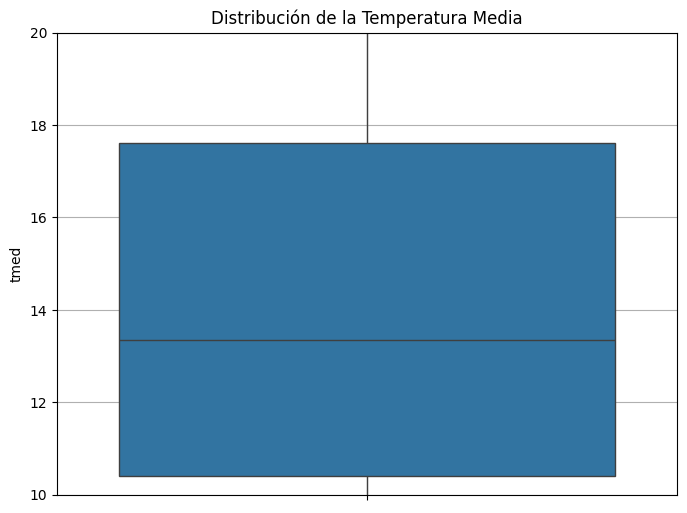

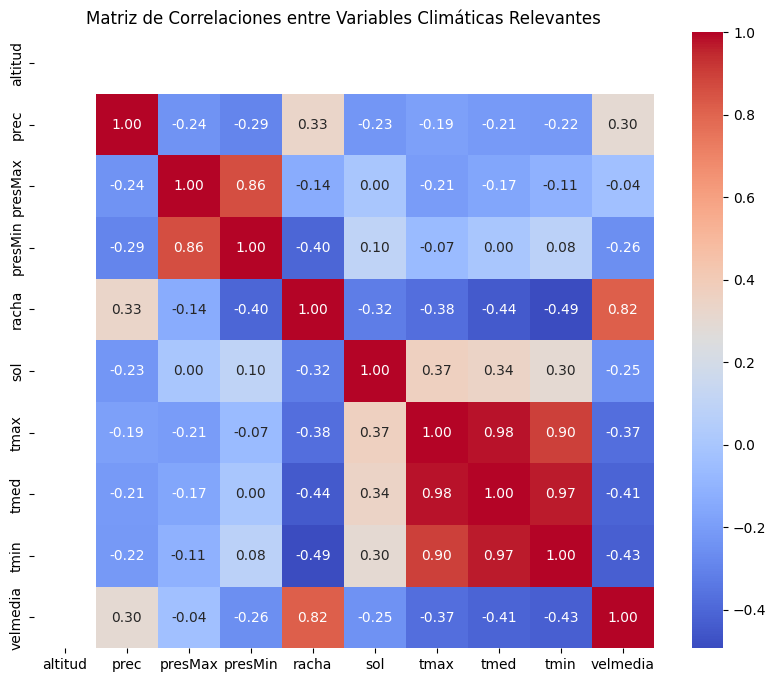

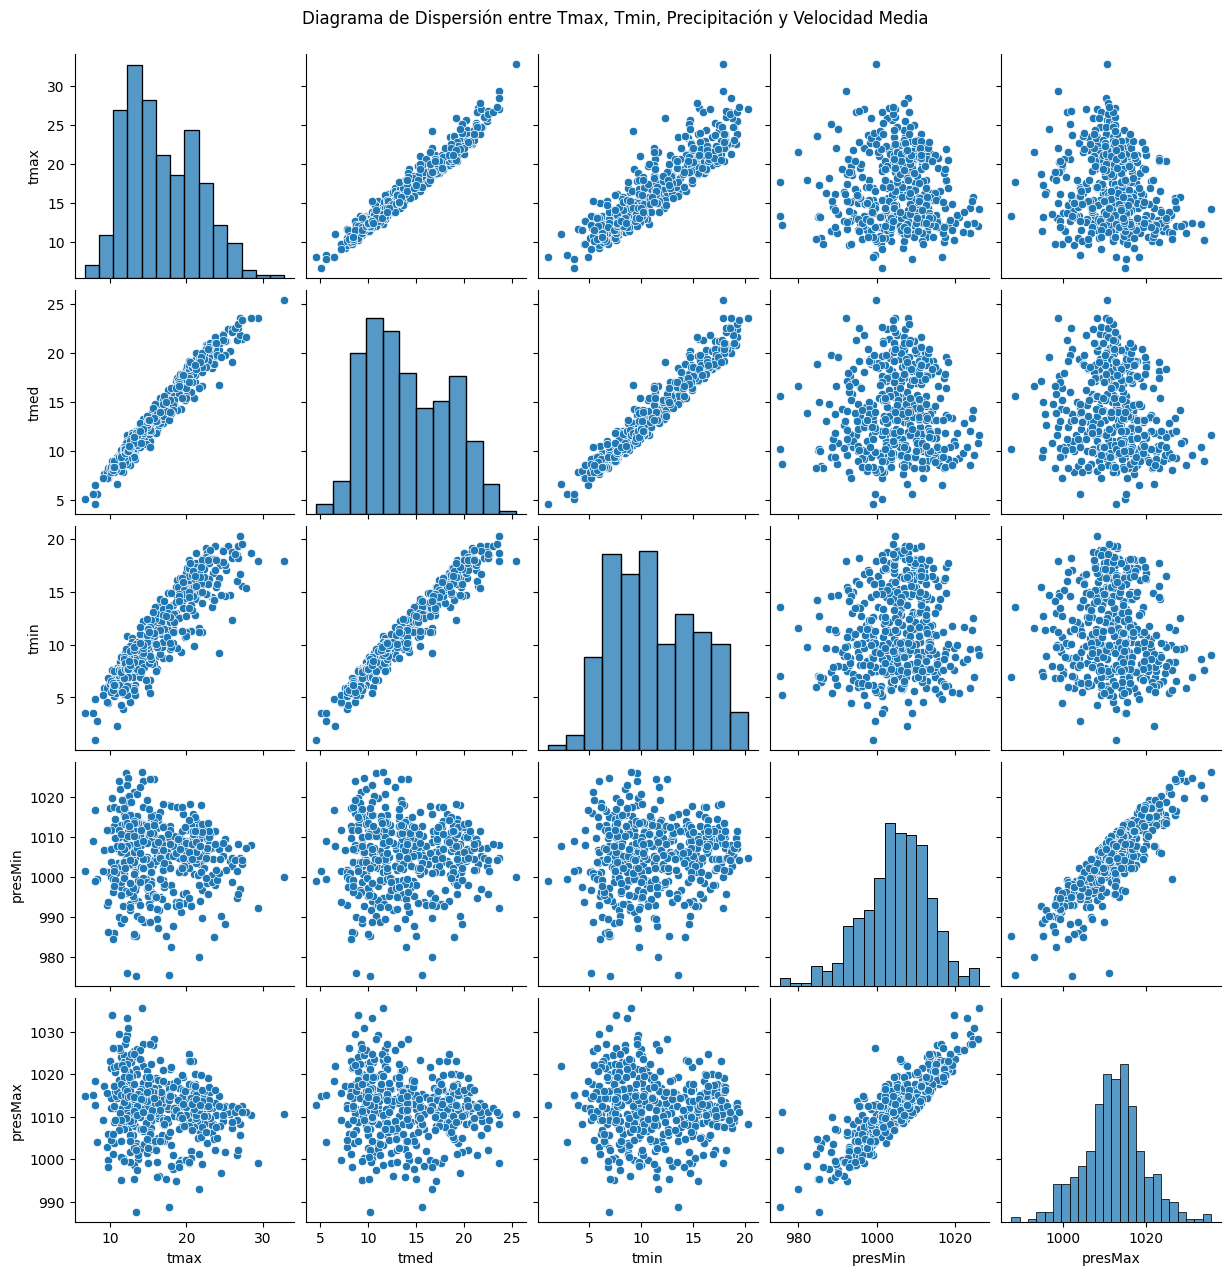

In [15]:

# grafica de líneas que muestre la evolución de la temperatura máxima y mínima a lo largo del tiempo.
plt.figure(figsize=(12, 6))
plt.plot(df['fecha'], df['tmax'], label='Temperatura Máxima', color='red')
plt.plot(df['fecha'], df['tmin'], label='Temperatura Mínima', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Evolución de la Temperatura Máxima y Mínima a lo largo del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Un boxplot de la temperatura media.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tmed'])
plt.ylim(10, 20)
plt.title('Distribución de la Temperatura Media')
plt.grid(True)
plt.show()

# diagrma de calor de las variables climáticas
numeric_df = df[['altitud', 'prec', 'presMax', 'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones entre Variables Climáticas Relevantes')
plt.show()

# diagrama de las cuatro varibles 
sns.pairplot(df[['tmax','tmed', 'tmin', 'presMin', 'presMax']])
plt.suptitle('Diagrama de Dispersión entre Tmax, Tmin, Precipitación y Velocidad Media', y=1.02)
plt.show()